## 피처 스케일링

* 스케일링(scaling)은 ```수치형 데이터```에 사용합니다. 
* 스케일링을 하는 이유?
* 특정 피처의 수치들이 다른 피처의 수치보다 상대적으로 크다면 해당 칼럼에 가중치(weight)를 적용하여 학습에 잘못된 영향을 줄 수 있습니다. 
* 따라서 이 ```수치의 크기를 유사하게 맞춰```주는 스케일링 기법을 적용해야 합니다. 
```
[예시]
사람이 이 데이터를 보았을 때 거래량과 종가는 서로 다른 정보이기 때문에 거래량의 수치가 엄청 크다고 해서 거래량이 종가보다 훨씬 중요한 정보라고 판단하지 않습니다. 
하지만 AI는 사람과 다르게 서로 다른 정보라는 개념이 없어 종가 보다 거래량 피처에 더 많은 가중치가 있어서 중요한 데이터로 잘못된 판단을 할 여지가 있습니다. 
```

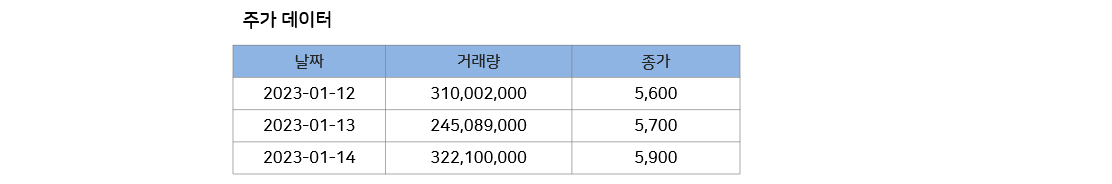

스케일링 기법 2가지
1. Min-Max Scaling: 정규화(Normalization)
    * 모든 데이터를 0~1사이로 꾸겨넣어 버림
    * 일반적인 상황에 사용
    * 박스플롯 상에 이상치가 없거나, 있어도 upper fence, lower fence 근처에 있으면 사용
2. Standard Scaling 표준화(Standardization)
    * 평균을 0, 표준 편차를 1로 맞춰 버림
    * 이상치가 있을 때 사용
3. Robust Scaling
    * 중앙값(Q2)을 0으로 잡고, Q1(25%)과 Q3(75%) 사분위수와 IQR 차이를 1이 되도록 함.
    * 이상치의 영향력을 최소화하여, 일반적ㅇ로 표준화, 정규화보다 성능이 우수하다고 함.





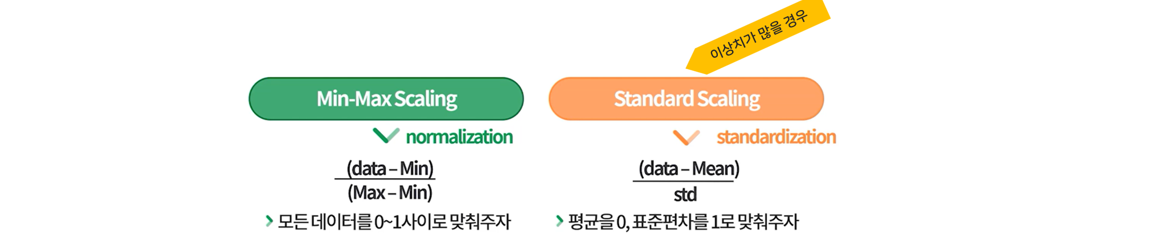

```
표준화, 정규화는 KNN,서포터 벡터 머신(SVM)과 같은 거리를 활용한 군집분석에 필수이다.

```

---

In [1]:
# 필요한 패키지 설치
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 100

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
df = pd.read_csv("./data/wine-clustering.csv")

# 데이터 샘플 확인
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# 기존 데이터 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df.mean(),'\n')
# 각 컬럼의 분산값
print(df.var())

Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64 

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64


```
마그네슙과 프롤린의 분산이 큰 것을 확인할 수 있다.
```

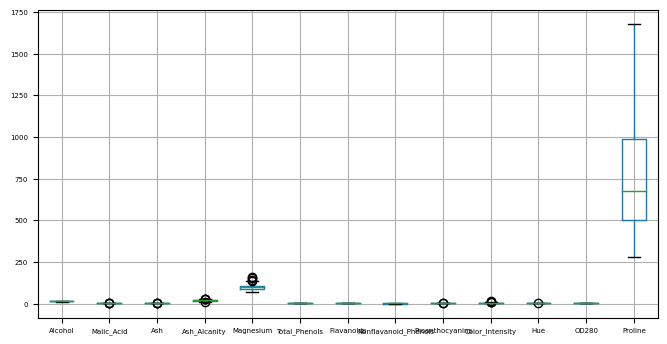

In [4]:
df.boxplot(fontsize=5,figsize=(8,4))
plt.show()

In [5]:
#프롤린을 제외하고 살펴봄
df.columns[:-1].tolist()

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280']

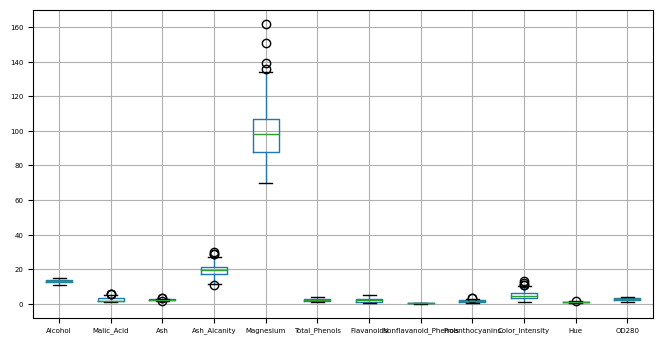

In [6]:
#proline의 값범위가 너무커 상대적으로 마그네슘 이상치 정도를 확인할 수 없음
#proline 제외하고 살펴보기


df.boxplot(column=df.columns[:-1].tolist(),fontsize=5,figsize=(8,4))
plt.show()

### StandardScaler()

* 평균이 0이고, 분산이 1인 정규 분포의 형태로 변환합니다. 
* 0을 중심으로 좌우로 적절히 데이터를 배치합니다. 

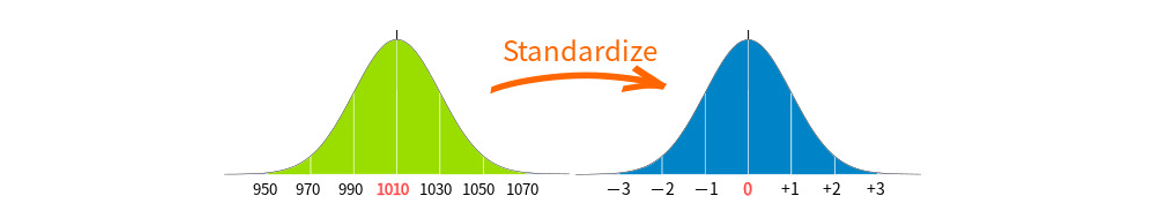

In [7]:
# 전체 컬럼 표준화

# 데이터 표준화 적용
StandardScaler = StandardScaler()
df_stand = StandardScaler.fit_transform(df)

# 컬럼명 결합
df_stand = pd.DataFrame(data=df_stand, columns=df.columns)

df_stand.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
# 데이터 표준화 스케일링 후 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_stand.mean())
print('\n')
# 각 컬럼의 분산값
print(df_stand.std())

Alcohol                -8.382808e-16
Malic_Acid             -1.197544e-16
Ash                    -8.370333e-16
Ash_Alcanity           -3.991813e-17
Magnesium              -3.991813e-17
Total_Phenols           0.000000e+00
Flavanoids             -3.991813e-16
Nonflavanoid_Phenols    3.592632e-16
Proanthocyanins        -1.197544e-16
Color_Intensity         2.494883e-17
Hue                     1.995907e-16
OD280                   3.193450e-16
Proline                -1.596725e-16
dtype: float64


Alcohol                 1.002821
Malic_Acid              1.002821
Ash                     1.002821
Ash_Alcanity            1.002821
Magnesium               1.002821
Total_Phenols           1.002821
Flavanoids              1.002821
Nonflavanoid_Phenols    1.002821
Proanthocyanins         1.002821
Color_Intensity         1.002821
Hue                     1.002821
OD280                   1.002821
Proline                 1.002821
dtype: float64


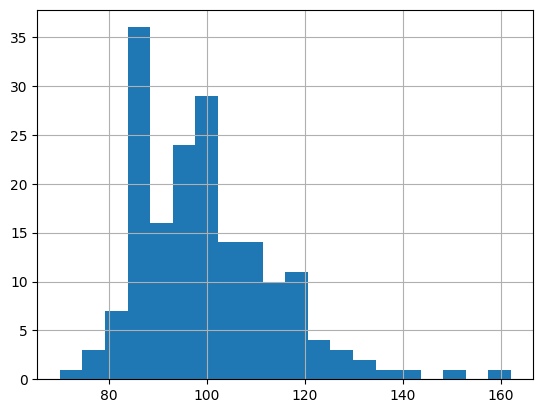

In [9]:
#스케일링 전
df['Magnesium'].hist(bins=20)
plt.show()

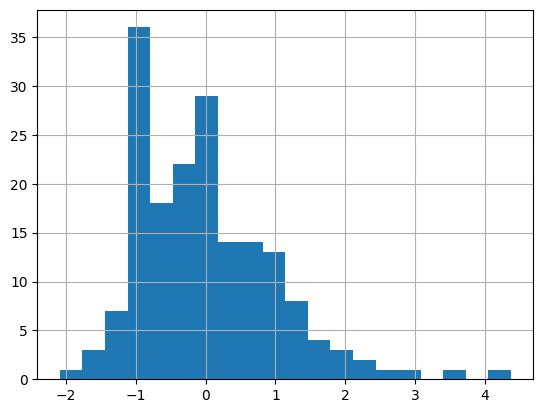

In [10]:
#스케일링 후
df_stand['Magnesium'].hist(bins=20)
plt.show()

### MinMaxScaler()

* Normalization
* 제일 작은 값을 0, 제일 큰 값을 1로 변환합니다. 
* 흩어진 데이터 분포를 0과 1사이에 모으려고 할 때 사용합니다. 

In [11]:
# 전체 컬럼 정규화

# 데이터 정규화 적용
mm_scaler = MinMaxScaler()
df_minmax = mm_scaler.fit_transform(df)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df.columns)

df_minmax.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [12]:
# 정규화 적용 컬럼 최솟값, 최댓값 확인

print(df_minmax.min()) #최솟값 
print('\n')
print(df_minmax.max()) #최댓값 

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64


Alcohol                 1.0
Malic_Acid              1.0
Ash                     1.0
Ash_Alcanity            1.0
Magnesium               1.0
Total_Phenols           1.0
Flavanoids              1.0
Nonflavanoid_Phenols    1.0
Proanthocyanins         1.0
Color_Intensity         1.0
Hue                     1.0
OD280                   1.0
Proline                 1.0
dtype: float64


In [13]:
# 데이터 정규화 스케일링 후 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_minmax.mean())
print('\n')
# 각 컬럼의 분산값
print(df_minmax.var())

Alcohol                 0.518584
Malic_Acid              0.315484
Ash                     0.538244
Ash_Alcanity            0.458502
Magnesium               0.323278
Total_Phenols           0.453487
Flavanoids              0.356386
Nonflavanoid_Phenols    0.437460
Proanthocyanins         0.372523
Color_Intensity         0.322363
Hue                     0.388170
OD280                   0.491460
Proline                 0.334446
dtype: float64


Alcohol                 0.045641
Malic_Acid              0.048744
Ash                     0.021523
Ash_Alcanity            0.029633
Magnesium               0.024101
Total_Phenols           0.046574
Flavanoids              0.044407
Nonflavanoid_Phenols    0.055139
Proanthocyanins         0.032600
Color_Intensity         0.039127
Hue                     0.034533
OD280                   0.067636
Proline                 0.050451
dtype: float64


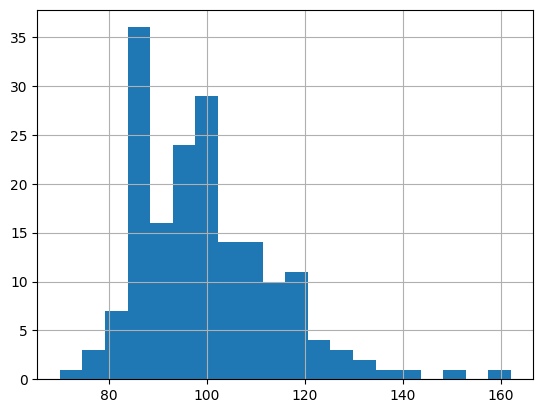

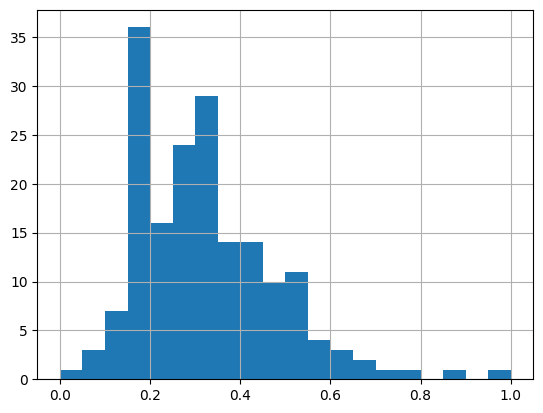

In [14]:
#스케일링 전
df['Magnesium'].hist(bins=20)
plt.show()

#스케일링 후
df_minmax['Magnesium'].hist(bins=20)
plt.show()

## RobustScaler

In [15]:
# 전체 컬럼 정규화

# 데이터 정규화 적용
rb_scaler = RobustScaler()
df_rb = rb_scaler.fit_transform(df)

# 컬럼명 결합
df_rb = pd.DataFrame(data=df_rb, columns=df.columns)

df_rb.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


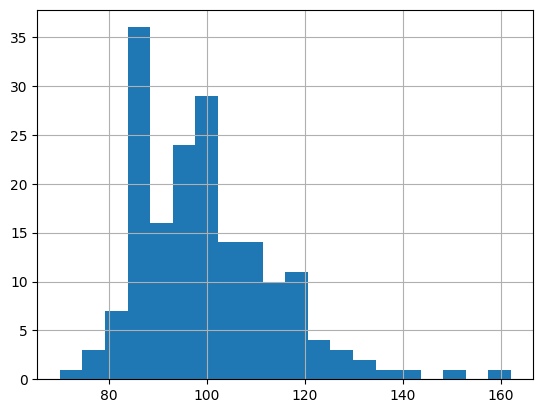

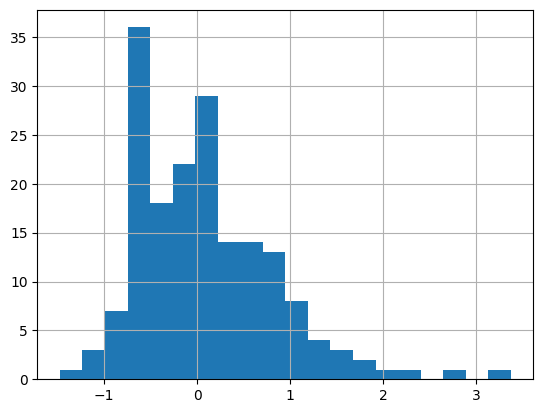

In [16]:

#스케일링 전
df['Magnesium'].hist(bins=20)
plt.show()
#스케일링 후
df_rb['Magnesium'].hist(bins=20)
plt.show()

### 주의사항 


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [18]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [19]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [20]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [21]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


```
[기억하기]
Scale 변환을 할 때는 반드시 테스트 데이터는 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
```

## 연습문제

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the 'diamonds' dataset from Seaborn
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


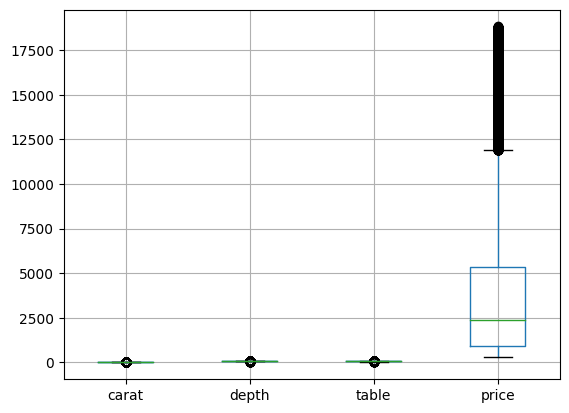

In [23]:
numerical_col = ['carat', 'depth', 'table', 'price']

diamonds[numerical_col].boxplot()
plt.show()

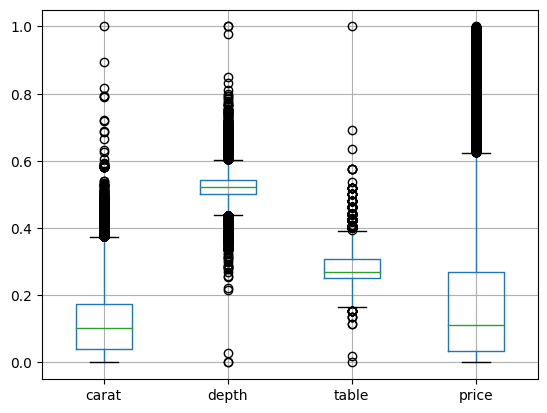

In [24]:
mm_scaler = MinMaxScaler()
mm_diamonds = mm_scaler.fit_transform(diamonds[numerical_col])
mm_diamonds_df = pd.DataFrame(mm_diamonds, columns=numerical_col)
mm_diamonds_df.boxplot()
plt.show()

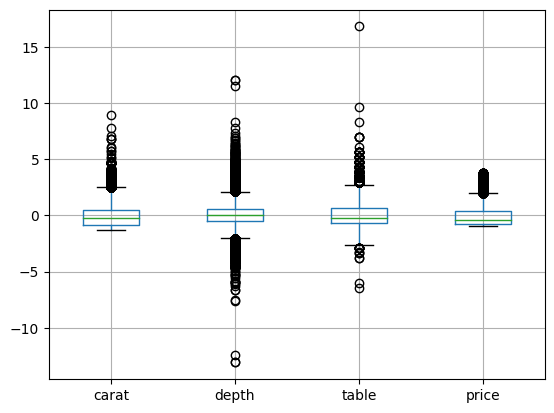

In [25]:
ss_scaler = StandardScaler()
ss_diamonds = ss_scaler.fit_transform(diamonds[numerical_col])
ss_diamonds_df = pd.DataFrame(ss_diamonds, columns=numerical_col)
ss_diamonds_df.boxplot()
plt.show()

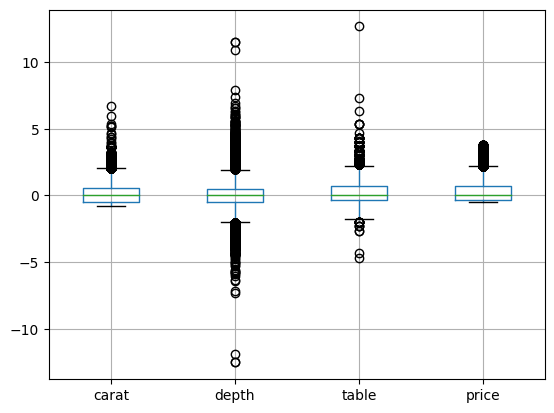

In [26]:
rb_scaler = RobustScaler()
rb_diamonds = rb_scaler.fit_transform(diamonds[numerical_col])
rb_diamonds_df = pd.DataFrame(rb_diamonds, columns=numerical_col)
rb_diamonds_df.boxplot()
plt.show()